![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 8 - Nonparametric Estimation</center>
### <center> Empirical CDF, Histogram, and KDE</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/08_NonParametricEstimation/MainNonParametricEstimation.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})
# np.random.seed(1)

### Generate some data from:
(GMM Model)

In [12]:
vW   =         np.array([0.5,  0.2,  0.3])
vMu  =         np.array([-3.0, 2.0,  3.0])
vSig = np.sqrt(np.array([2,    0.1,  0.1]))

xx   = np.linspace(-7, 6, 10001)
vPx  = sum([vW[ii] / np.sqrt(2 * np.pi * vSig[ii]**2) * np.exp(-(xx - vMu[ii])**2 / (2 * vSig[ii]**2)) for ii in range(3)])
vFx  = np.cumsum(vPx) * (xx[1] - xx[0])

N    = 1000
vX   = np.row_stack([vSig[ii] * np.random.randn(int(N * vW[ii]), 1) + vMu[ii] for ii in range(3)]).squeeze()

### Plot Histogram:

In [3]:
from ipywidgets import interact, IntSlider, Layout

def PlotHist(K = 10):
    plt.figure(figsize=(10, 5))
    plt.hist(vX, bins=K, color='b', edgecolor='k', density=True, label='Histogram')
    plt.plot(xx, vPx, c='r', lw=2,                               label='$f_x$')
    plt.title(f'$K = {K}$')
    plt.legend()

kSlider = IntSlider(min=5, max=250, step=5, value=5, layout=Layout(width='80%'))
interact(PlotHist, K=kSlider)
plt.show()

interactive(children=(IntSlider(value=5, description='K', layout=Layout(width='80%'), max=250, min=5, step=5),…

### Plot KDE:

In [11]:
from ipywidgets        import interact, FloatSlider, Layout
from sklearn.neighbors import KernelDensity

def PlotKDE(σ = 1):
    if σ == 0:
        σ = 1e-2
    
    oKDE   = KernelDensity(kernel='gaussian', bandwidth=σ).fit(vX[:,None])
    vHatPx = np.exp(oKDE.score_samples(xx[:,None]).squeeze())
    
    plt.figure(figsize=(10, 5)); plt.grid(True)
    plt.plot(xx, vHatPx, color='b', lw=2,  label='KDE')
    plt.plot(xx, vPx,    color='r', lw=2,  label='$f_x$')
    plt.title(f'σ = {σ}')
    plt.legend()

σSlider = FloatSlider(min=.00, max=1, step=.05, value=1, layout=Layout(width='80%'))
interact(PlotKDE, σ=σSlider)
plt.show()

interactive(children=(FloatSlider(value=1.0, description='σ', layout=Layout(width='80%'), max=1.0, step=0.05),…

### ECDF

###  Exercise:
* Compute the ECDF:
$$\hat{F}_{X}\left(x\right)=\frac{1}{N}\sum_{i=1}^{N}\mathbb{I}\left\{ x_{i}\leq x\right\} $$
Compare your result to the true CDF $F_x$ (`vFx`)
* This can be done using a very few lines (also in one line)

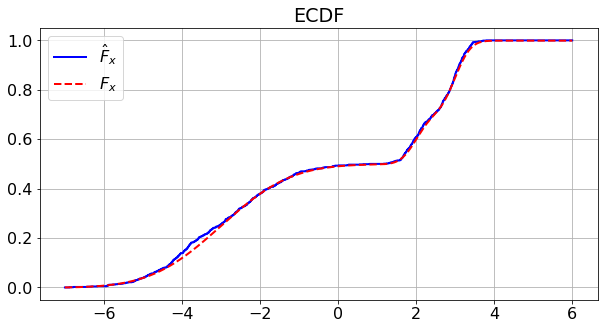

In [29]:
vHatFx = ???

plt.figure(figsize=(10, 5)); plt.grid(True)
plt.plot(xx, vHatFx, color='b',  lw=2,  label='$\hat{F}_x$')
plt.plot(xx, vFx,    'r--',      lw=2,  label='$F_x$')
plt.title('ECDF')
plt.legend()
plt.show()

In [ ]:
# np.mean((vX[:,None] < xx[None,:]).astype(float), axis=0)